# Homework Pandas

### 1° Task 

In this opportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

**Steps:**
1. Load the file.

In [143]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#cargar archivo
data_file="hawaii-profile.csv"
data = pd.read_csv(data_file)

#verificar carga de archivo
data.head()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


2. Clean the DataFrame, so check if the DataFrame has:
    * NaN values and remove them.
    * duplicate rows and remove them.
    * any other problems like out of range values and remove them.

In [144]:
#chequeo de dimensiones
sh=data.shape
print(sh)
#chequeo de presencia de NaN
data.isnull().values.any()

(212, 5)


True

In [145]:
#eliminación de NaN
data = data.dropna()
#chequeo de nuevas dimensiones
data.shape

(206, 5)

In [146]:
#chequeo de presencia de valores duplicados
data[data.duplicated()].any()

latitude            True
longitude           True
distance_km         True
topography_km       True
disturbance_mgal    True
dtype: bool

In [147]:
#eliminación de duplicados
data = data.drop_duplicates()
#chequeo de nuevas dimensiones
data.shape

(201, 5)

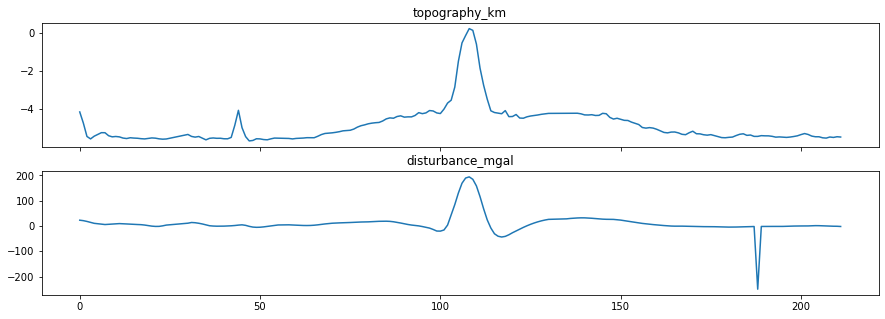

In [148]:
#gráficas exploratorias de columnas de interés para detectar outliers
names = ["distance_km", "topography_km", "disturbance_mgal"]

fig, axes = plt.subplots(2, sharex=True, figsize=(15, 5))

axes[0].plot(data[names[1]])
axes[0].set_title(names[1])

axes[1].plot(data[names[2]])
axes[1].set_title(names[2])

plt.show()

In [149]:
#localización de outlier en la anomalía de gravedad
outlier_=data[data.disturbance_mgal < -200]
print(outlier)
#eliminación del outlier
data.drop(data[data.disturbance_mgal < -200].index, inplace=True)

      latitude  longitude  distance_km  topography_km  disturbance_mgal
188  27.596965 -152.61819  2124.327461       -5.44891       -250.043523


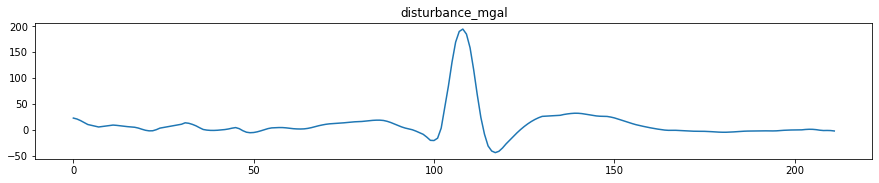

In [150]:
#gráfica para verificar la eliminación del outlier
fig, axes = plt.subplots(figsize=(15, 2.5))
plt.plot(data[names[2]])
plt.title(names[2])
plt.show()

3. Plot the _gravity disturbance & distance_ and the _bathimetry & distance_ using `subplot`.
   Make the plot as if you were going to put it in an article. 

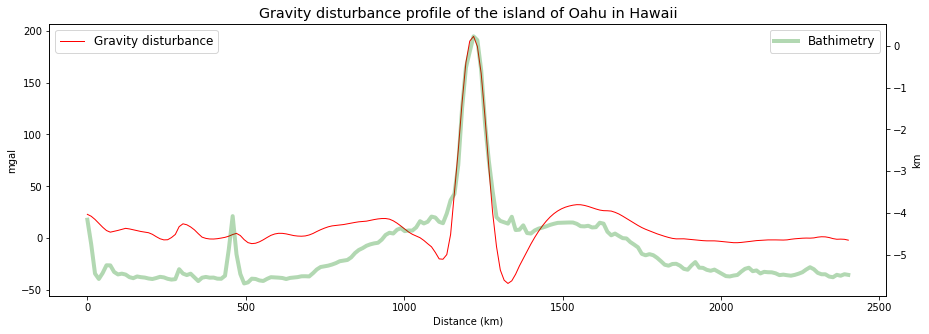

In [151]:
#gráfica final
fig, axes = plt.subplots(figsize=(15, 5))

axes.plot(data[names[0]],data[names[2]],'-r', linewidth=1, alpha=1, label="Gravity disturbance")
axes.set_title("Gravity disturbance profile of the island of Oahu in Hawaii",fontsize="x-large")
axes.set(ylabel="mgal",xlabel="Distance (km)")
axes2 = axes.twinx() #creación de eje secundario
axes2.plot(data[names[0]],data[names[1]],'-g', linewidth=4, label="Bathimetry", alpha=0.3)
axes2.set(ylabel="km")
axes.legend(loc="upper left",fontsize="large")
axes2.legend(fontsize="large")

plt.show()

### Bonus track

We can see from the bathymetry profile that there is a long-wavelength component (almost a gaussian shape) right around the islands.
This is due to the _thermal swell_ of the hotspot and not part of the flexure response of the oceanic lithosphere.
The swell is isostatically compensated, as seen in the gravity disturbance.
We'll fit a gaussian curve to the profile data and remove it from our observations to obtain a residual.

**Steps:**
1. Define the gaussian function:
   $$ h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right) $$

In [152]:
def hg(x,h0,G,x0,sigma):
    h=h0+G*np.e**(-((x-x0)/sigma)**2)
    return h

2. Estime los parámetros de esta función (($h_0$, $G$, $x_0$, $\sigma$). Puede comenzar con $h_0$, $G$, $x_0$, $\sigma$) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calculate the thermal swell.

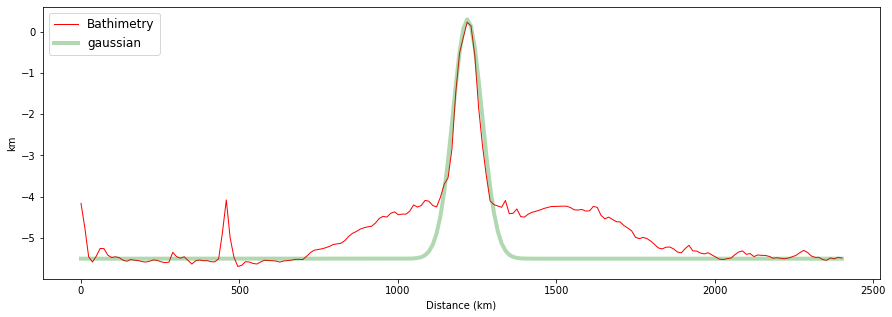

In [153]:
x=data[names[0]]
h0=-5.5
G=5.8
x0=1220
sigma=65
h=hg(x,h0,G,x0,sigma)

fig, axes = plt.subplots(figsize=(15, 5))

axes.plot(data[names[0]],data[names[1]],'-r', linewidth=1, alpha=1, label="Bathimetry")
#axes.set_title("Gravity disturbance profile of the island of Oahu in Hawaii",fontsize="x-large")
axes.set(ylabel="km",xlabel="Distance (km)")
#axes2 = axes.twinx() #creación de eje secundario
axes.plot(x,h,'-g', linewidth=4, label="gaussian", alpha=0.3)
#axes.set(ylabel="km")
#axes2.set_label("topo")
axes.legend(loc="upper left",fontsize="large")
#axes2.legend(fontsize="large")

plt.show()

4. Calculate a residual topography and store it in our original `DataFrame`.
   $$ residual = topography_{km} - swell$$

In [154]:
data.columns
data["Residual topography [km]"] = data["topography_km"] - h
data.head()

,latitude,longitude,distance_km,topography_km,disturbance_mgal,Residual topography [km]
0,13.000000,-165.000000,0.000000,-4.161000,23.008098,1.339000
1,13.082915,-164.929648,12.070042,-4.747907,21.180807,0.752093
2,13.165829,-164.859296,24.140085,-5.452608,18.099661,0.047392
3,13.248744,-164.788945,36.210127,-5.581402,14.372280,-0.081402
4,13.331658,-164.718593,48.280170,-5.438978,10.606283,0.061022


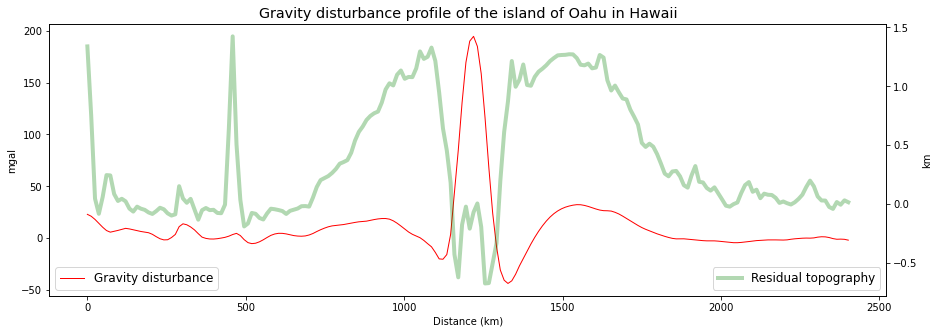

In [155]:
#gráfica final
names = ["distance_km", "Residual topography [km]", "disturbance_mgal"]
fig, axes = plt.subplots(figsize=(15, 5))

axes.plot(data[names[0]],data[names[2]],'-r', linewidth=1, alpha=1, label="Gravity disturbance")
axes.set_title("Gravity disturbance profile of the island of Oahu in Hawaii",fontsize="x-large")
axes.set(ylabel="mgal",xlabel="Distance (km)")
axes2 = axes.twinx() #creación de eje secundario
axes2.plot(data[names[0]],data[names[1]],'-g', linewidth=4, label="Residual topography", alpha=0.3)
axes2.set(ylabel="km")
axes.legend(loc="lower left",fontsize="large")
axes2.legend(fontsize="large", loc="lower right")

plt.show()